In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL #image library in python / PIL stands for Python Imaging Library used to open, manipulate and save images in python
import tensorflow as tf 
import os 
import cv2 # cv2 = OpenCV (Open Source Computer Vision Library). It allows you to process, analyze, and understand images and videos in real-time.

from tensorflow import keras

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.rglob('*/*.jpg')))
image_count

3670

Lets view the list of first 5 images of roses

In [6]:
roses = list(data_dir.rglob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

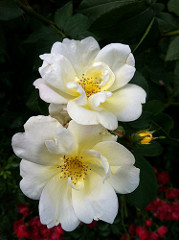

In [7]:
PIL.Image.open(str(roses[0]))

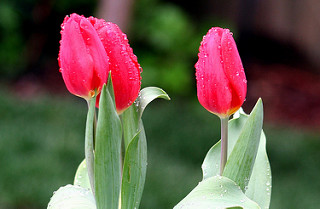

In [8]:
tulips = list(data_dir.rglob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [9]:
flower_images_dict = {
    'roses': list(data_dir.rglob('roses/*')), 
    'daisy': list(data_dir.rglob('daisy/*')), 
    'dandelion': list(data_dir.rglob('dandelion/*')), 
    'sunflowers': list(data_dir.rglob('sunflowers/*')), 
    'tulips': list(data_dir.rglob('tulips/*'))
}

In [10]:
flower_labels_dict = {
    'roses': 0, 
    'daisy': 1, 
    'dandelion': 2, 
    'sunflowers': 3, 
    'tulips': 4
}

In [11]:
flower_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [12]:
str(flower_images_dict['roses'][0])

'datasets\\flower_photos\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [13]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [14]:
img.shape

(240, 179, 3)

OpenCV library can also be used to resize the image

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X = []
y = [] 

for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [17]:
y[:5]

[0, 0, 0, 0, 0]

In [18]:
X[:5]

[array([[[ 1, 16,  7],
         [ 1, 16,  7],
         [ 1, 17,  9],
         ...,
         [23, 50, 31],
         [25, 51, 32],
         [26, 52, 33]],
 
        [[10, 23, 15],
         [10, 23, 15],
         [ 9, 22, 14],
         ...,
         [20, 44, 30],
         [23, 47, 33],
         [26, 50, 36]],
 
        [[13, 20, 13],
         [12, 20, 13],
         [11, 19, 12],
         ...,
         [21, 43, 30],
         [22, 45, 31],
         [25, 48, 34]],
 
        ...,
 
        [[12, 24, 18],
         [11, 22, 15],
         [12, 21, 11],
         ...,
         [ 7, 14,  7],
         [ 2,  8,  2],
         [ 0,  2,  0]],
 
        [[19, 30, 28],
         [16, 26, 21],
         [14, 22, 15],
         ...,
         [ 3, 12,  2],
         [ 0,  8,  1],
         [ 0,  6,  1]],
 
        [[11, 21, 20],
         [17, 25, 24],
         [21, 28, 23],
         ...,
         [ 1, 12,  2],
         [ 2, 10,  3],
         [ 3, 10,  4]]], dtype=uint8),
 array([[[13, 18, 17],
         [11, 13, 1

In [19]:
X[0].shape

(180, 180, 3)

Converting X and y to array:

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Scaling X_train and X_test:

In [22]:
X_train_scaled = X_train / 255 
X_test_scaled = X_test / 255

In [23]:
num_classes = 5 

model = keras.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'), 
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'), 
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'), 
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(num_classes)
])

In [24]:
model.compile(optimizer='adam', 
# When from_logits=True, TensorFlow automatically applies the softmax internally to the logits before computing the loss. we did this because we didn't mention activation function in Dense layer. 
# If from_logits=False, this means that the model is outputting probabilities (which have already been passed through a softmax or sigmoid function).
#  In that case, there's no need for an additional softmax transformation. from_logits=False would have been the case if we could have applied softmax in output layer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy']) 

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 252ms/step - accuracy: 0.3649 - loss: 1.5185
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 283ms/step - accuracy: 0.5963 - loss: 1.0002
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 271ms/step - accuracy: 0.6858 - loss: 0.7944
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 259ms/step - accuracy: 0.7800 - loss: 0.6107
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 259ms/step - accuracy: 0.8553 - loss: 0.4222
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 268ms/step - accuracy: 0.9195 - loss: 0.2490
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 302ms/step - accuracy: 0.9517 - loss: 0.1547
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 284ms/step - accuracy: 0.9786 - loss: 0.0858
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 276ms/step - accuracy: 0.9835 - loss: 0.0580
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 284ms/step - accuracy: 0.9895 - loss: 0.0476
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 290ms/step - accuracy: 0.9986 - loss: 0.0112
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 25

In [25]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.6736 - loss: 2.2625


[2.290835380554199, 0.6655773520469666]

We got 99% accuracy for our training data whereas this number dropped to nearly 66 percent for testing data which shows that our model is overfitted. 

In [26]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step


array([[  0.21590693,  31.002548  ,   5.2032313 , -22.756937  ,
         -1.1909323 ],
       [  7.2541027 ,   0.39908716, -11.924855  , -10.921803  ,
          5.8457413 ],
       [ -0.06085734,  -4.7073293 ,  13.441294  , -16.38765   ,
         -6.2982187 ],
       ...,
       [ -1.1488084 ,  -4.9337935 ,  -8.221887  ,   6.12967   ,
          7.6391788 ],
       [  0.77129287,   4.5882864 ,  -2.3302784 , -10.824344  ,
          0.9537645 ],
       [  1.4886299 , -13.257326  ,  -3.776392  ,   6.0738363 ,
          4.0713587 ]], dtype=float32)

as we can see that we are getting raw values it is because we didn't apply softmax activation function on output layer. So we can perform this now aswell. 

In [27]:
prediction_classes = tf.nn.softmax(predictions)
prediction_classes

<tf.Tensor: shape=(918, 5), dtype=float32, numpy=
array([[4.26119406e-14, 1.00000000e+00, 6.24452269e-12, 4.49317304e-24,
        1.04363522e-14],
       [8.02827358e-01, 8.46304407e-04, 3.76102482e-09, 1.02547713e-08,
        1.96326345e-01],
       [1.36801089e-06, 1.31266171e-08, 9.99998689e-01, 1.11033497e-13,
        2.67446976e-09],
       ...,
       [1.24924627e-04, 2.83693703e-06, 1.05888610e-07, 1.80988476e-01,
        8.18883657e-01],
       [2.09588800e-02, 9.52943802e-01, 9.42698447e-04, 1.92951020e-07,
        2.51544267e-02],
       [8.90775025e-03, 3.51302409e-09, 4.60466508e-05, 8.73168170e-01,
        1.17878035e-01]], dtype=float32)>

In [28]:
prediction_classes = [np.argmax(x) for x in prediction_classes]
prediction_classes

[1,
 0,
 2,
 4,
 2,
 3,
 4,
 4,
 3,
 0,
 1,
 3,
 2,
 3,
 2,
 1,
 1,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 4,
 0,
 1,
 0,
 2,
 2,
 3,
 1,
 1,
 0,
 2,
 4,
 1,
 0,
 4,
 4,
 4,
 2,
 3,
 3,
 2,
 2,
 4,
 4,
 4,
 1,
 1,
 1,
 2,
 0,
 3,
 4,
 4,
 2,
 2,
 4,
 4,
 1,
 1,
 3,
 4,
 4,
 4,
 1,
 2,
 2,
 0,
 1,
 0,
 4,
 4,
 0,
 4,
 4,
 0,
 3,
 1,
 1,
 4,
 2,
 3,
 0,
 2,
 0,
 2,
 2,
 3,
 3,
 2,
 3,
 0,
 1,
 4,
 2,
 2,
 4,
 1,
 4,
 2,
 1,
 1,
 4,
 0,
 1,
 1,
 3,
 3,
 3,
 3,
 0,
 0,
 1,
 0,
 1,
 4,
 0,
 2,
 1,
 2,
 2,
 2,
 4,
 2,
 3,
 0,
 4,
 1,
 0,
 1,
 3,
 1,
 2,
 3,
 3,
 2,
 4,
 0,
 2,
 1,
 0,
 4,
 2,
 2,
 0,
 2,
 4,
 2,
 0,
 3,
 4,
 0,
 2,
 4,
 3,
 0,
 1,
 4,
 0,
 1,
 4,
 1,
 4,
 4,
 4,
 4,
 0,
 0,
 2,
 4,
 3,
 1,
 4,
 3,
 2,
 2,
 4,
 1,
 4,
 4,
 3,
 2,
 2,
 2,
 4,
 2,
 1,
 1,
 4,
 0,
 2,
 4,
 4,
 2,
 0,
 2,
 2,
 2,
 0,
 4,
 2,
 2,
 0,
 0,
 3,
 3,
 2,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 3,
 3,
 0,
 1,
 0,
 3,
 2,
 2,
 1,
 4,
 1,
 4,
 4,
 4,
 2,
 3,
 2,
 1,
 0,
 0,
 4,
 3,


In [29]:
prediction_classes[0]

1

In [30]:
y_test[0]

1

So we got correct prediction for our first testing data. 1 represents "daisy". But still we must improve our model as the accuracy is only near 65%

### In order to deal with overfitting we will perform data augmentation: 

In [31]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal', input_shape=(180, 180, 3)), 
    keras.layers.RandomRotation(0.1), 
    keras.layers.RandomZoom(0.1)
])

c:\Users\moosa\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


original image:

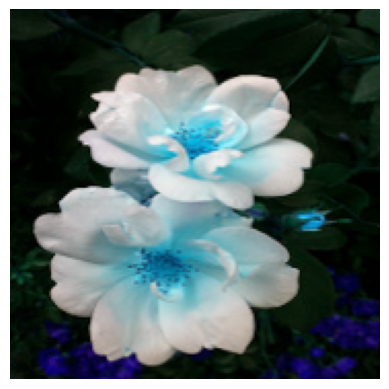

In [32]:
# plt.axis('off') turns off the axis labels and ticks for a cleaner image display.
plt.axis('off')
plt.imshow(X[0])

image after augmentation:

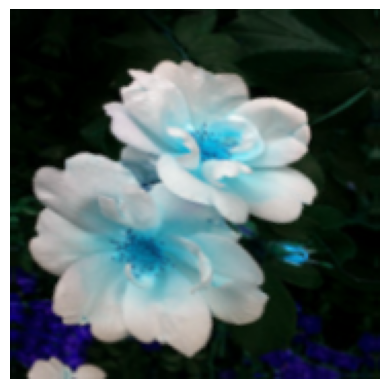

In [33]:
# Applying augmentation
# 1. `X[0]` selects the first image in the dataset `X`.
# 2. `tf.expand_dims(X[0], 0)` adds an extra dimension to the image, making its shape (1, 180, 180, 3), 
#    as data_augmentation expects a batch of images (even if the batch has size 1).
# 3. `data_augmentation(..., training=True)` applies random augmentations (e.g., zoom, flip) to the image
#    because `training=True` ensures that augmentations are applied during training mode.
# 4. `[0]` selects the first (and only) image from the batch of augmented images returned by `data_augmentation`.
augmented = data_augmentation(tf.expand_dims(X[0], 0), training=True)[0]

plt.axis('off')

# 1. `augmented.numpy()` converts the augmented image (Tensor) into a NumPy array, 
#    so it can be used with matplotlib for display.
# 2. `.astype("uint8")` ensures the pixel values are in the range [0, 255] (integer type), 
#    which is necessary for proper image visualization.
plt.imshow(augmented.numpy().astype("uint8"))

In [34]:
num_classes = 5 

# we will applying data augmentation and dropout regularization in our CNN to avoid overfitting:
model2 = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'), 
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'), 
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'), 
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(num_classes)
])

In [35]:
model2.compile(optimizer='adam', 
# When from_logits=True, TensorFlow automatically applies the softmax internally to the logits before computing the loss. we did this because we didn't mention activation function in Dense layer. 
# If from_logits=False, this means that the model is outputting probabilities (which have already been passed through a softmax or sigmoid function).
#  In that case, there's no need for an additional softmax transformation. from_logits=False would have been the case if we could have applied softmax in output layer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy']) 

model2.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 343ms/step - accuracy: 0.3040 - loss: 1.5894
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 399ms/step - accuracy: 0.5425 - loss: 1.1436
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 359ms/step - accuracy: 0.6006 - loss: 1.0056
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 383ms/step - accuracy: 0.6512 - loss: 0.8963
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 345ms/step - accuracy: 0.6473 - loss: 0.8950
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 314ms/step - accuracy: 0.6840 - loss: 0.8172
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 353ms/step - accuracy: 0.6915 - loss: 0.7750
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 342ms/step - accuracy: 0.7166 - loss: 0.7546
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 390ms/step - accuracy: 0.7247 - loss: 0.6933
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 379ms/step - accuracy: 0.7529 - loss: 0.6747
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 396ms/step - accuracy: 0.7417 - loss: 0.6656
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 30

In [36]:
model2.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.7190 - loss: 0.9885


[1.0151680707931519, 0.7309368252754211]

After performing data augmentation and dropout regularization out model's performance on testing data increased from 66% to 73%.